## Diabetes Dataset (sklearn)

Uses a Diabetes [dataset](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt) to predict diabetes progression in next year using ElasticNet.
The predicted "progression" column is a quantitative measure of disease progression one year after baseline
Combines the above with the [Lasso Coordinate Descent Path Plot](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html)

Original author: Alexandre Gramfort <alexandre.gramfort@inria.fr>; License: BSD 3 clause
The [main page](https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)
[Related paper](https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf)

Usage:
 python train_diabetes.py 0.01 0.01
 python train_diabetes.py 0.01 0.75
 python train_diabetes.py 0.01 1.0

In [1]:
import os
import warnings
import sys

import pandas as pd
import numpy as np
import mlyzer

In [ ]:
# from sklearn import datasets
# Load Diabetes datasets
# diabetes = datasets.load_diabetes()

print("Read the diabetes txt file from the URL")
csv_url ='https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'
try:
    data = pd.read_csv(csv_url, sep='\t')
except Exception as e:
    logger.exception(
    "Unable to download training & test CSV, check your internet connection. Error: %s", e)
df = data
d_mean = data.mean() ; d_std = data.std(); # print("mean & std are:", d_mean, d_std)
diabetes = (data-d_mean)/d_std

X = data.drop(data.columns[[10]], axis = 1, inplace = False) 
y = data.iloc[:,10]

diabetes.iloc[:,10] = y
data = diabetes.rename(columns={'Y': 'progression'})

Read the diabetes txt file from the URL


In [16]:
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.00,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.00,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.00,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.00,180,93.4,43.0,4.00,5.3845,88,310


In [17]:
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,progression
0,0.799594,1.064282,1.295620,0.459320,-0.928693,-0.731236,-0.911418,-0.054438,0.418057,-0.370569,151
1,-0.039522,-0.937474,-1.080955,-0.552878,-0.177423,-0.402430,1.562643,-0.829361,-1.434962,-1.936285,75
2,1.791277,1.064282,0.933475,-0.119079,-0.957588,-0.718084,-0.679475,-0.054438,0.060087,-0.544537,141
3,-1.870322,-0.937474,-0.243495,-0.769778,0.256002,0.524802,-0.756789,0.720486,0.476443,-0.196600,206
4,0.113044,-0.937474,-0.764079,0.459320,0.082632,0.327519,0.170984,-0.054438,-0.671740,-0.979458,135
5,-1.946605,-0.937474,-0.854615,-0.408278,-1.448804,-1.665045,0.866813,-1.604285,-0.864700,-2.023269,97
6,-0.954922,1.064282,-0.990419,-0.335978,-0.842008,-0.520800,0.016355,-0.829361,-1.321254,-0.805490,138
7,1.333577,1.064282,-0.039789,1.399218,1.903018,2.287202,0.480241,0.371770,-0.752140,0.064353,63
8,0.875877,1.064282,1.295620,-0.842078,-0.293003,0.130235,-0.602160,-0.054438,-0.314154,0.238321,110
9,-1.488905,-0.937474,0.820305,-0.697478,-0.264108,-0.724660,-0.524846,-0.054438,1.422478,-0.283584,310


In [18]:
df.describe(include = 'all')

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [14]:
data.describe(include = 'all')

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,progression
count,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,0.000000,2.893613e-16,1.125294e-16,1.044916e-15,-2.893613e-16,-1.125294e-16,-1.245861e-16,-1.527185e-16,2.451533e-16,2.531911e-16,152.133484
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,77.093005
min,-2.251738,-9.374744e-01,-1.895781e+00,-2.360375e+00,-2.662394e+00,-2.427874e+00,-2.148448e+00,-1.604285e+00,-2.648040e+00,-2.893112e+00,25.000000
25%,-0.783285,-9.374744e-01,-7.188104e-01,-7.697777e-01,-7.192046e-01,-6.375263e-01,-7.374604e-01,-8.293610e-01,-6.981574e-01,-6.967595e-01,87.000000
50%,0.113044,-9.374744e-01,-1.529591e-01,-1.190789e-01,-9.073818e-02,-8.020037e-02,-1.382738e-01,-5.443750e-02,-4.089059e-02,-2.263165e-02,140.500000
75%,0.799594,1.064282e+00,6.562083e-01,7.485196e-01,5.955183e-01,6.267323e-01,6.155415e-01,7.204860e-01,6.810788e-01,5.862581e-01,211.500000
max,2.325260,1.064282e+00,3.581660e+00,2.772916e+00,3.232188e+00,4.174548e+00,3.804760e+00,3.889923e+00,2.805543e+00,2.847848e+00,346.000000


# Data Visualization

In [189]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', None)
sns.set(style="ticks", color_codes=True)

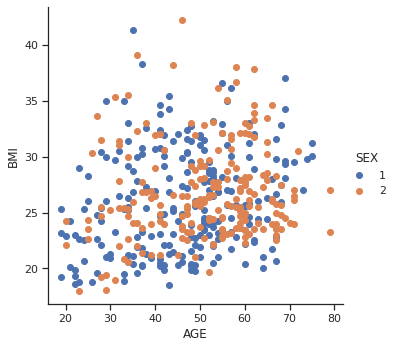

In [190]:
sns.FacetGrid(df, hue="SEX", size=5).map(plt.scatter, "AGE", "BMI").add_legend();

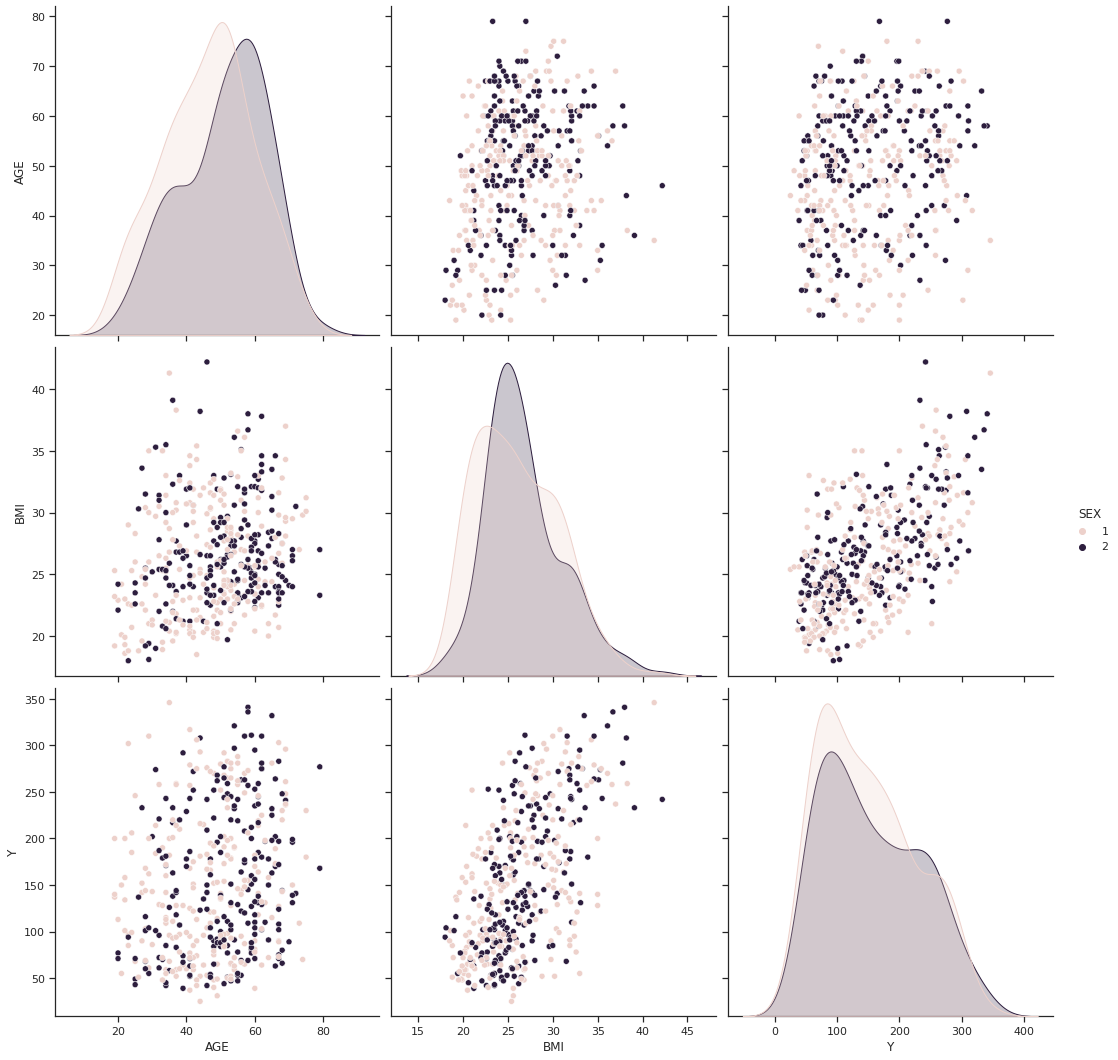

In [191]:
sns.pairplot(df.drop({"S1", "S2", "S3", "S4", "S5", "S6", "BP"},axis=1), hue="SEX", size=5);

In [208]:
import altair as alt
from vega_datasets import data

source = df

alt.Chart(source).mark_point().encode(
    x='AGE',
    y='BMI',
    size='Y'
)

alt.Chart(...)

In [223]:
import plotly.graph_objs as go
d = [go.Scatter(x = df["AGE"],y = df["BMI"],mode = 'markers')]
layout = go.Layout(title='Diabetes Dataset - AGE vs BMI', xaxis=dict(title='Age'), yaxis=dict(title='BMI'))
fig = go.Figure(data=d, layout=layout)
fig